1000
Sampled indices (i, j):


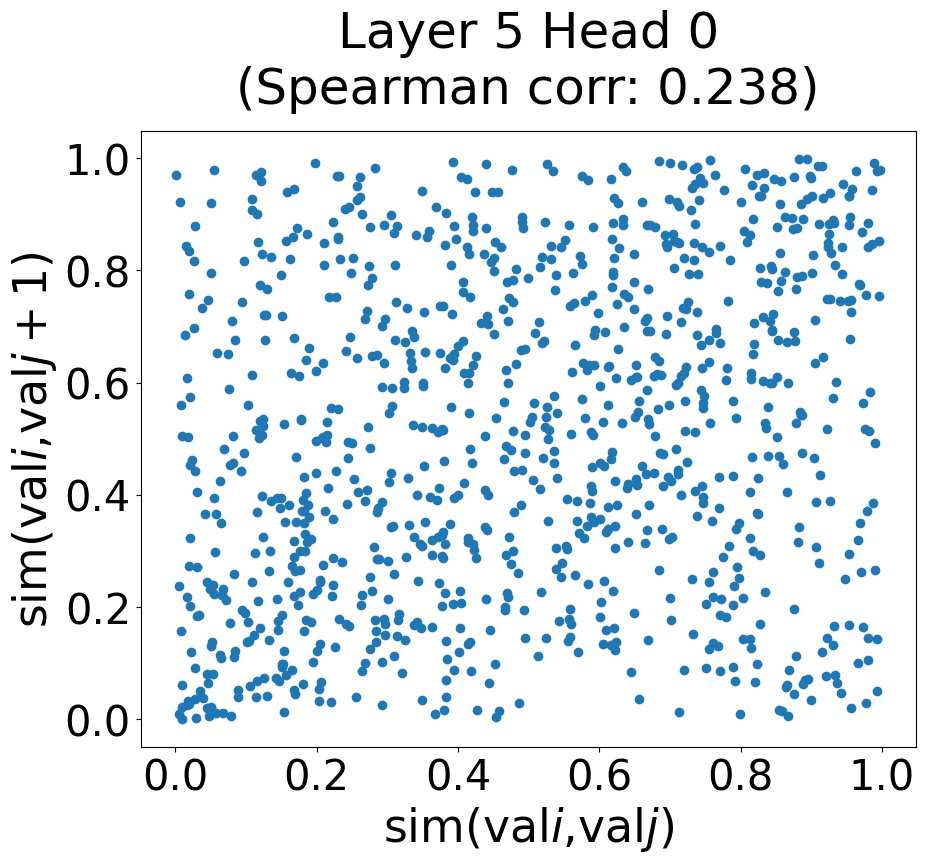

In [ ]:
#!/usr/bin/env python3
import numpy as np
import os
import matplotlib.pyplot as plt

def load_attention_data(file_path):
    """加载保存的注意力数据"""
    return np.load(file_path)

# 加载数据
input_dir = "../output_attention_data"
file_path = os.path.join(input_dir, "key_0.npy")
value_data = load_attention_data(file_path)

# 计算余弦相似度矩阵
def cosine_similarity_matrix(values):
    norm = np.linalg.norm(values, axis=1, keepdims=True)
    normalized_values = values / norm
    sim_ij = np.dot(normalized_values, normalized_values.T)
    return sim_ij

sim_ij = cosine_similarity_matrix(value_data)

# 生成上三角掩码（True 表示需要掩码的部分）
mask = np.triu(np.ones_like(sim_ij, dtype=bool))

# 将上三角部分设为 NaN，以便在热力图中隐藏
sim_ij_masked = np.where(mask, np.nan, sim_ij)
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
x_values = []
y_values = []
n=value_data.shape[0]
# 生成所有下三角的索引对 (i, j)
lower_triangle_indices = [(i, j) for i in range(2, n) for j in range(1,i-1)]

# 随机采样 k 个点
k = 1000  # 假设采样 100 个点
sampled_indices = random.sample(lower_triangle_indices, k)
# sampled_indices=lower_triangle_indices
print(len(sampled_indices))
lower_triangular_values = sim_ij_masked[np.tril_indices_from(sim_ij_masked)]
# 对值进行排序
sorted_values = np.sort(lower_triangular_values)
q=len(sorted_values)
# 打印采样的索引
print("Sampled indices (i, j):")
p=0
for item in sampled_indices:
    i,j=item
    rank1 = np.searchsorted(sorted_values, sim_ij_masked[i, j]) + 1
    x_values.append(rank1/q)
    rank2 = np.searchsorted(sorted_values, sim_ij_masked[i, j+1]) + 1
    y_values.append(rank2/q)
    
# 绘制散点图
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values)
plt.xlabel('sim(val$i$,val$j$)' , fontsize=33)
plt.ylabel('sim(val$i$,val${j+1}$)', fontsize=33)
personr,_=stats.pearsonr(x_values,y_values)
title = f'Layer 5 Head 0\n(Spearman corr: {round(personr, 3)})'
plt.title(title, fontsize=36, pad=20)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
# plt.tight_layout()
plt.savefig(f'spersonr_value.pdf', format='pdf', bbox_inches='tight')
plt.show()


1000
Sampled indices (i, j):


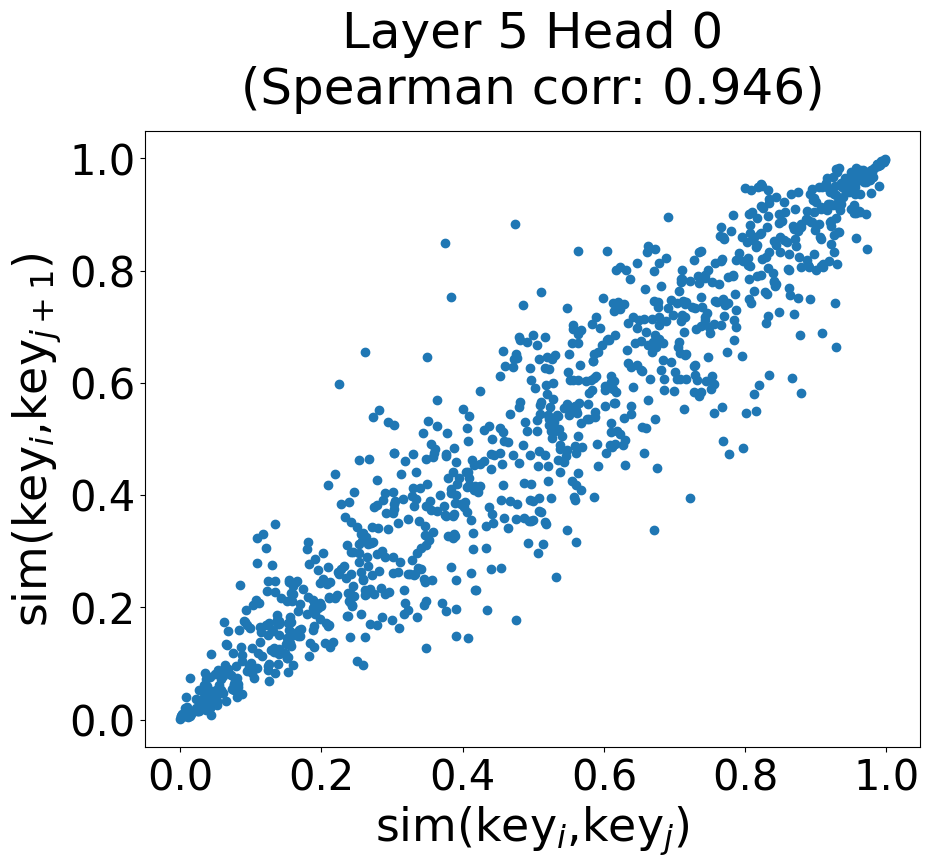

In [ ]:
#!/usr/bin/env python3
import numpy as np
import os
import matplotlib.pyplot as plt

def load_attention_data(file_path):
    """加载保存的注意力数据"""
    return np.load(file_path)

# 加载数据
input_dir = "../output_attention_data"
file_path = os.path.join(input_dir, "value_0.npy")
value_data = load_attention_data(file_path)

# 计算余弦相似度矩阵
def cosine_similarity_matrix(values):
    norm = np.linalg.norm(values, axis=1, keepdims=True)
    normalized_values = values / norm
    sim_ij = np.dot(normalized_values, normalized_values.T)
    return sim_ij

sim_ij = cosine_similarity_matrix(value_data)

# 生成上三角掩码（True 表示需要掩码的部分）
mask = np.triu(np.ones_like(sim_ij, dtype=bool))

# 将上三角部分设为 NaN，以便在热力图中隐藏
sim_ij_masked = np.where(mask, np.nan, sim_ij)
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
x_values = []
y_values = []
n=value_data.shape[0]
# 生成所有下三角的索引对 (i, j)
lower_triangle_indices = [(i, j) for i in range(2, n) for j in range(1,i-1)]

# 随机采样 k 个点
k = 1000  # 假设采样 100 个点
sampled_indices = random.sample(lower_triangle_indices, k)
# sampled_indices=lower_triangle_indices
print(len(sampled_indices))
lower_triangular_values = sim_ij_masked[np.tril_indices_from(sim_ij_masked)]
# 对值进行排序
sorted_values = np.sort(lower_triangular_values)
q=len(sorted_values)
# 打印采样的索引
print("Sampled indices (i, j):")
p=0
for item in sampled_indices:
    i,j=item
    rank1 = np.searchsorted(sorted_values, sim_ij_masked[i, j]) + 1
    x_values.append(rank1/q)
    rank2 = np.searchsorted(sorted_values, sim_ij_masked[i, j+1]) + 1
    y_values.append(rank2/q)
    
# 绘制散点图
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values)
plt.xlabel('sim(key$_i$,key$_j$)' , fontsize=33)
plt.ylabel('sim(key$_i$,key$_{j+1}$)', fontsize=33)
personr,_=stats.pearsonr(x_values,y_values)
title = f'Layer 5 Head 0\n(Spearman corr: {round(personr, 3)})'
plt.title(title, fontsize=36, pad=20)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
# plt.tight_layout()
plt.savefig(f'spersonr_key.pdf', format='pdf', bbox_inches='tight')
plt.show()
